<a href="https://colab.research.google.com/github/jblanco75/holbertonschool-machine_learning/blob/main/ML_Portfolio_Project/RL_trading_A2C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 33.2 MB/s 
     |████████████████████████████████| 171 kB 36.9 MB/s 


In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 8.3 kB/s 
     |████████████████████████████████| 412.3 MB 28 kB/s 
     |████████████████████████████████| 503 kB 67.1 MB/s 
     |████████████████████████████████| 3.8 MB 57.1 MB/s 
     |████████████████████████████████| 50 kB 9.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=082e0dfe2596192e64ded669a203dcc1eb97689236c542b12e3c25a4482468a9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
     

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
df = pd.read_csv('/content/Download Data - FUTURE_US_XCME_ES00.csv', thousands=',')
df

,Date,Open,High,Low,Close
0,07/25/2022,3967.75,3988.75,3946.00,3970.00
1,07/22/2022,3988.00,4016.25,3941.50,3965.00
2,07/21/2022,3954.00,4004.75,3930.25,4001.25
3,07/20/2022,3947.00,3977.25,3922.25,3962.50
4,07/19/2022,3838.50,3948.00,3834.00,3937.50
...,...,...,...,...,...
247,07/30/2021,4394.25,4405.00,4370.75,4389.50
248,07/29/2021,4393.75,4422.50,4380.50,4411.80
249,07/28/2021,4380.00,4407.75,4377.50,4393.80
250,07/27/2021,4415.75,4416.00,4364.75,4394.60


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2022-07-25,3967.75,3988.75,3946.00,3970.00
2022-07-22,3988.00,4016.25,3941.50,3965.00
2022-07-21,3954.00,4004.75,3930.25,4001.25
2022-07-20,3947.00,3977.25,3922.25,3962.50
2022-07-19,3838.50,3948.00,3834.00,3937.50


In [ ]:
env = gym.make('stocks-v0', df=df, window_size=10, frame_bound=(10,100))

In [ ]:
env.signal_features

array([[ 3.97000e+03,  0.00000e+00],
       [ 3.96500e+03, -5.00000e+00],
       [ 4.00125e+03,  3.62500e+01],
       [ 3.96250e+03, -3.87500e+01],
       [ 3.93750e+03, -2.50000e+01],
       [ 3.83375e+03, -1.03750e+02],
       [ 3.86500e+03,  3.12500e+01],
       [ 3.79325e+03, -7.17500e+01],
       [ 3.80450e+03,  1.12500e+01],
       [ 3.82375e+03,  1.92500e+01],
       [ 3.85675e+03,  3.30000e+01],
       [ 3.90125e+03,  4.45000e+01],
       [ 3.90500e+03,  3.75000e+00],
       [ 3.84825e+03, -5.67500e+01],
       [ 3.83400e+03, -1.42500e+01],
       [ 3.82725e+03, -6.75000e+00],
       [ 3.78950e+03, -3.77500e+01],
       [ 3.82125e+03,  3.17500e+01],
       [ 3.82550e+03,  4.25000e+00],
       [ 3.90375e+03,  7.82500e+01],
       [ 3.91625e+03,  1.25000e+01],
       [ 3.79975e+03, -1.16500e+02],
       [ 3.76275e+03, -3.70000e+01],
       [ 3.76775e+03,  5.00000e+00],
       [ 3.67575e+03, -9.20000e+01],
       [ 3.67125e+03, -4.50000e+00],
       [ 3.79350e+03,  1.22250e+02],
 

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 531.75, 'total_profit': 0.816398190134839, 'position': 1}


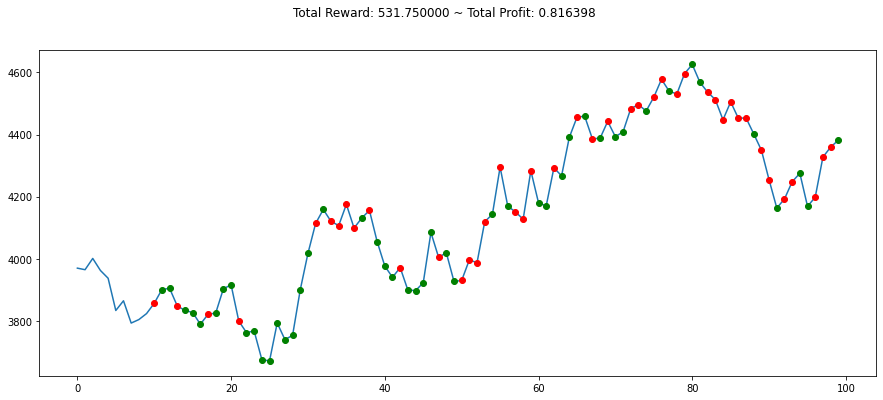

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=10)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
---------------------------------
| explained_variance | 0.176    |
| fps                | 358      |
| nupdates           | 137600   |
| policy_entropy     | 0.683    |
| total_timesteps    | 688000   |
| value_loss         | 0.0333   |
---------------------------------
----------------------------------
| explained_variance | -7.07e-05 |
| fps                | 358       |
| nupdates           | 137700    |
| policy_entropy     | 0.688     |
| total_timesteps    | 688500    |
| value_loss         | 1.5e+03   |
----------------------------------
---------------------------------
| explained_variance | 8.11e-06 |
| fps                | 358      |
| nupdates           | 137800   |
| policy_entropy     | 0.673    |
| total_timesteps    | 689000   |
| value_loss         | 1.24e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.035    |
| fps                | 358      |
| nupda

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=10)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -78.0, 'total_profit': 0.9675150196839163, 'position': 0}


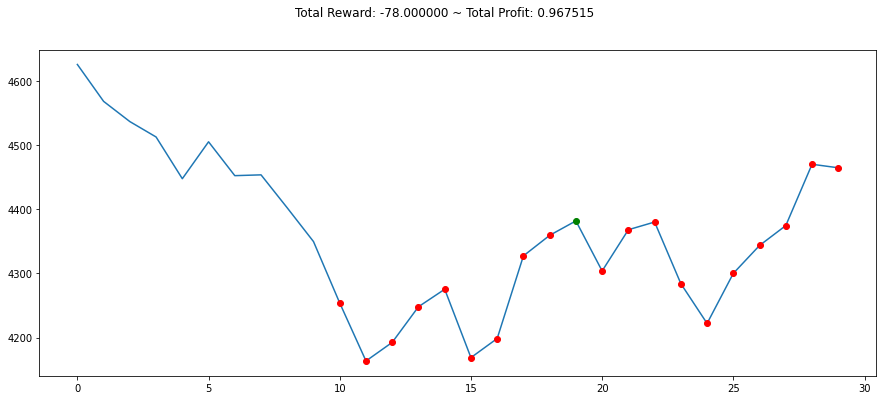

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()